# Exploratory Data Analysis (EDA) 

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

In [50]:
def read_json(file_name, name):

    with open(file_name) as f:
        d = json.load(f)

    df = pd.json_normalize(d[name])
    
    print(df.dtypes)
    print("Data shape:{}".format(df.shape))
    
    return df

In [51]:
events_df = read_json("data/events.json", "events")

event        object
sessionid    object
eventtime    object
price        object
productid    object
dtype: object
Data shape:(387656, 5)


In [52]:
events_df.head(3)

,event,sessionid,eventtime,price,productid
0,cart,a0655eee-1267-4820-af21-ad8ac068ff7a,2020-06-01T08:59:16.406Z,14.48,HBV00000NVZE8
1,cart,d2ea7bd3-9235-4a9f-a9ea-d7f296e71318,2020-06-01T08:59:46.580Z,49.90,HBV00000U2B18
2,cart,5e594788-78a0-44dd-8e66-37022d48f691,2020-06-01T08:59:33.308Z,1.99,OFIS3101-080


In [53]:
meta_df = read_json("data/meta.json", "meta")

productid      object
brand          object
category       object
subcategory    object
name           object
dtype: object
Data shape:(10236, 5)


In [54]:
meta_df.head(3)

,productid,brand,category,subcategory,name
0,HBV00000AX6LR,Palette,Kişisel Bakım,Saç Bakımı,Palette Kalıcı Doğal Renkler 10-4 PAPATYA
1,HBV00000BSAQG,Best,Pet Shop,Kedi,Best Pet Jöle İçinde Parça Etli Somonlu Konser...
2,HBV00000JUHBA,Tarım Kredi,Temel Gıda,"Bakliyat, Pirinç, Makarna",Türkiye Tarım Kredi Koop.Yeşil Mercimek 1 kg


## Data Preprocessing

In [55]:
print(len(events_df['productid'].unique()))

10236


In [56]:
print(len(meta_df['productid'].unique()))

10236


Merge datasets by productid

In [57]:
sales_df = events_df.merge(meta_df, how='left', on='productid')

In [58]:
sales_df

,event,sessionid,eventtime,price,productid,brand,category,subcategory,name
0,cart,a0655eee-1267-4820-af21-ad8ac068ff7a,2020-06-01T08:59:16.406Z,14.48,HBV00000NVZE8,None,"Et, Balık, Şarküteri",Kırmızı Et,Dana Kıyma (%5-%7 Yağ) 250 gr
1,cart,d2ea7bd3-9235-4a9f-a9ea-d7f296e71318,2020-06-01T08:59:46.580Z,49.90,HBV00000U2B18,Oral-B,Kişisel Bakım,Ağız Bakım,Diş Fırçası Yedek Başlığı Stages Çocuk 2 Adet
2,cart,5e594788-78a0-44dd-8e66-37022d48f691,2020-06-01T08:59:33.308Z,1.99,OFIS3101-080,Noki,Oyuncak ve Kırtasiye,Dosyalama ve Arşivleme,Noki Dosya Çıtçıtlı Evrak Zarfı Kırmızı 3101 T...
3,cart,fdfeb652-22fa-4153-b9b5-4dfa0dcaffdf,2020-06-01T08:59:31.911Z,2.25,HBV00000NVZBW,None,Meyve ve Sebze,Sebze,Domates 500 gr
4,cart,9e9d4f7e-898c-40fb-aae9-256c40779933,2020-06-01T08:59:33.888Z,9.95,HBV00000NE0T4,Carrefour,Temel Gıda,Sıvı Yağ,Carrefour Ayçiçek Yağı 1 lt
...,...,...,...,...,...,...,...,...,...
387651,cart,0ce386d3-f9ae-46b1-a018-baa5ea91be0c,2020-06-15T03:55:05.322Z,19.90,HBV00000OE884,Carrefour,İçecekler,Kahve,Carrefour Selection Espresso Forte 10 Adet Kapsül
387652,cart,69be07e4-737d-4935-b2eb-e02ecd94986b,2020-06-15T03:56:50.064Z,9.95,HBV00000OE8AU,Carrefour,Atıştırmalık,Kuruyemiş,Carrefour Çiğ Fındık İçi 150 gr
387653,cart,25f6960c-0144-419d-8761-2b539c75c9c9,2020-06-15T03:03:23.859Z,21.95,HBV00000PQM1C,Vernel,Ev Bakım ve Temizlik,Çamaşır Yıkama,Vernel Yumuşatıcı Taze Gül 5 Lt
387654,cart,eebd42a5-2d95-41b9-bc10-83db56ba3989,2020-06-15T03:29:54.865Z,17.50,HBV00000NFHXT,Carte D'or,Dondurma,Kap Dondurma,Carte Dor Classic Myv Ygrt Dond 925ml


In [59]:
sales_df.describe()

,event,sessionid,eventtime,price,productid,brand,category,subcategory,name
count,387656,387656,387656,387650,387650,255805,387650,387650,387650
unique,1,54442,387196,1217,10235,789,20,132,10123
top,cart,08a906d4-4999-403c-a334-d296106d49cf,2020-06-10T13:05:15.116Z,18.48,HBV00000NVZGU,Carrefour,Meyve ve Sebze,Sebze,Dana Biftek 250 gr
freq,387656,308,3,16750,17082,36683,76021,47590,17082


Convert eventtime feature type to datetime

In [60]:
sales_df['eventtime'] = pd.to_datetime(sales_df['eventtime'])

In [61]:
sales_df["hour"] = sales_df['eventtime'].map(lambda x: x.hour)
sales_df["day"] = sales_df['eventtime'].map(lambda x: x.day)
sales_df["month"] = sales_df['eventtime'].map(lambda x: x.month)
sales_df["year"] = sales_df['eventtime'].map(lambda x: x.year)

In [62]:
sales_df.describe()

,hour,day,month,year
count,387656.000000,387656.000000,387656.000000,387656.0
mean,12.518565,6.808869,5.998749,2020.0
std,5.211153,4.522621,0.043585,0.0
min,0.000000,1.000000,2.000000,2020.0
25%,8.000000,3.000000,6.000000,2020.0
50%,12.000000,6.000000,6.000000,2020.0
75%,17.000000,11.000000,6.000000,2020.0
max,23.000000,31.000000,8.000000,2020.0


Drop any row with null value and delete features with constant value which will not give any additinal information for the model.

In [63]:
sales_df.dropna()
sales_df.loc[:, (sales_df != sales_df.iloc[0]).any()] 

,sessionid,eventtime,price,productid,brand,category,subcategory,name,hour,day,month
0,a0655eee-1267-4820-af21-ad8ac068ff7a,2020-06-01 08:59:16.406000+00:00,14.48,HBV00000NVZE8,None,"Et, Balık, Şarküteri",Kırmızı Et,Dana Kıyma (%5-%7 Yağ) 250 gr,8,1,6
1,d2ea7bd3-9235-4a9f-a9ea-d7f296e71318,2020-06-01 08:59:46.580000+00:00,49.90,HBV00000U2B18,Oral-B,Kişisel Bakım,Ağız Bakım,Diş Fırçası Yedek Başlığı Stages Çocuk 2 Adet,8,1,6
2,5e594788-78a0-44dd-8e66-37022d48f691,2020-06-01 08:59:33.308000+00:00,1.99,OFIS3101-080,Noki,Oyuncak ve Kırtasiye,Dosyalama ve Arşivleme,Noki Dosya Çıtçıtlı Evrak Zarfı Kırmızı 3101 T...,8,1,6
3,fdfeb652-22fa-4153-b9b5-4dfa0dcaffdf,2020-06-01 08:59:31.911000+00:00,2.25,HBV00000NVZBW,None,Meyve ve Sebze,Sebze,Domates 500 gr,8,1,6
4,9e9d4f7e-898c-40fb-aae9-256c40779933,2020-06-01 08:59:33.888000+00:00,9.95,HBV00000NE0T4,Carrefour,Temel Gıda,Sıvı Yağ,Carrefour Ayçiçek Yağı 1 lt,8,1,6
...,...,...,...,...,...,...,...,...,...,...,...
387651,0ce386d3-f9ae-46b1-a018-baa5ea91be0c,2020-06-15 03:55:05.322000+00:00,19.90,HBV00000OE884,Carrefour,İçecekler,Kahve,Carrefour Selection Espresso Forte 10 Adet Kapsül,3,15,6
387652,69be07e4-737d-4935-b2eb-e02ecd94986b,2020-06-15 03:56:50.064000+00:00,9.95,HBV00000OE8AU,Carrefour,Atıştırmalık,Kuruyemiş,Carrefour Çiğ Fındık İçi 150 gr,3,15,6
387653,25f6960c-0144-419d-8761-2b539c75c9c9,2020-06-15 03:03:23.859000+00:00,21.95,HBV00000PQM1C,Vernel,Ev Bakım ve Temizlik,Çamaşır Yıkama,Vernel Yumuşatıcı Taze Gül 5 Lt,3,15,6
387654,eebd42a5-2d95-41b9-bc10-83db56ba3989,2020-06-15 03:29:54.865000+00:00,17.50,HBV00000NFHXT,Carte D'or,Dondurma,Kap Dondurma,Carte Dor Classic Myv Ygrt Dond 925ml,3,15,6


In [64]:
sales_df.month.unique()

array([6, 5, 4, 2, 3, 8, 7])

In [65]:
sales_df.day.unique()

array([ 1, 29, 30, 31, 28, 17,  9,  8,  4,  3, 23, 22,  2,  6, 16,  5, 12,
       11, 10, 18, 27, 13,  7, 19, 14, 21, 15, 26, 25, 24, 20])

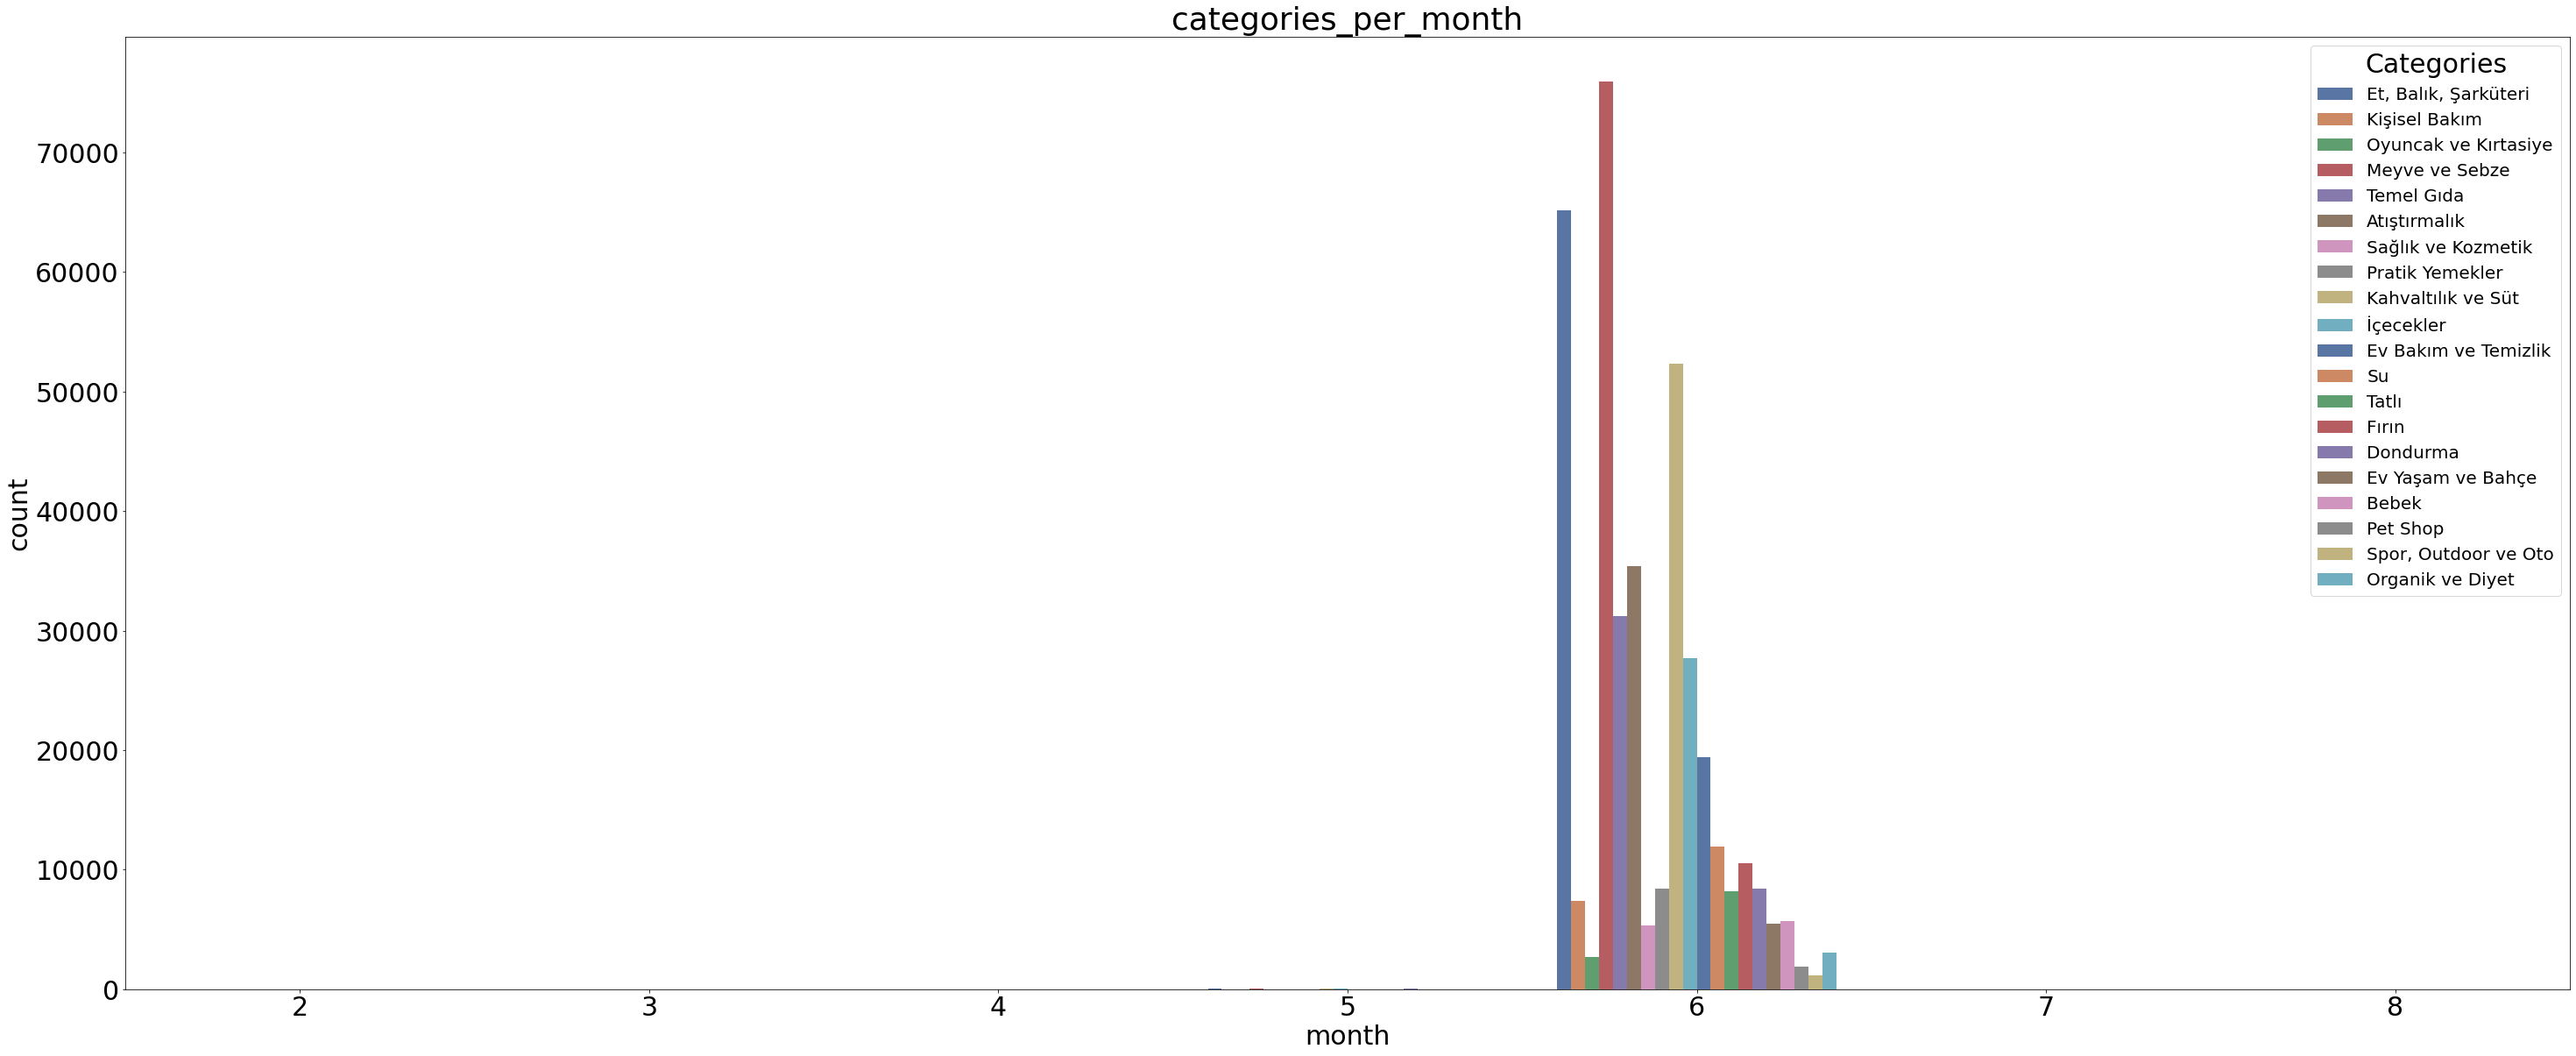

In [66]:
plt.figure(figsize=(50, 20))
plt.rcParams['font.size'] = '30'
palette = sns.color_palette("deep")
sns.countplot(x="month", hue="category", data=sales_df, palette=palette)
plt.legend(fontsize=20, loc='upper right', title='Categories')
plt.title('categories_per_month')
plt.show()
plt.close()

In [68]:
categories = sales_df.category.unique()
monthly_categories = sales_df.groupby(['month', 'category']).size()
monthly_categories = monthly_categories.reset_index(name='size')

In [69]:
monthly_categories

,month,category,size
0,2,"Et, Balık, Şarküteri",2
1,2,Kahvaltılık ve Süt,1
2,2,Meyve ve Sebze,6
3,2,Temel Gıda,1
4,3,Meyve ve Sebze,10
5,4,Atıştırmalık,1
6,4,Dondurma,3
7,4,"Et, Balık, Şarküteri",4
8,4,Ev Bakım ve Temizlik,2
9,4,Fırın,1


In [70]:
monthly_categories.groupby(['month'])['size'].sum()

month
2        10
3        10
4        24
5       376
6    387224
7         3
8         3
Name: size, dtype: int64

Most of the data is collected in 6th month and other months have very few data compared to this month. These months will not give any usefull information for the session due to lack of information. So i eleminated these datas.

In [71]:
sales_df = sales_df[sales_df.month==6]
del sales_df['month']

In [72]:
sales_df

,event,sessionid,eventtime,price,productid,brand,category,subcategory,name,hour,day,year
0,cart,a0655eee-1267-4820-af21-ad8ac068ff7a,2020-06-01 08:59:16.406000+00:00,14.48,HBV00000NVZE8,None,"Et, Balık, Şarküteri",Kırmızı Et,Dana Kıyma (%5-%7 Yağ) 250 gr,8,1,2020
1,cart,d2ea7bd3-9235-4a9f-a9ea-d7f296e71318,2020-06-01 08:59:46.580000+00:00,49.90,HBV00000U2B18,Oral-B,Kişisel Bakım,Ağız Bakım,Diş Fırçası Yedek Başlığı Stages Çocuk 2 Adet,8,1,2020
2,cart,5e594788-78a0-44dd-8e66-37022d48f691,2020-06-01 08:59:33.308000+00:00,1.99,OFIS3101-080,Noki,Oyuncak ve Kırtasiye,Dosyalama ve Arşivleme,Noki Dosya Çıtçıtlı Evrak Zarfı Kırmızı 3101 T...,8,1,2020
3,cart,fdfeb652-22fa-4153-b9b5-4dfa0dcaffdf,2020-06-01 08:59:31.911000+00:00,2.25,HBV00000NVZBW,None,Meyve ve Sebze,Sebze,Domates 500 gr,8,1,2020
4,cart,9e9d4f7e-898c-40fb-aae9-256c40779933,2020-06-01 08:59:33.888000+00:00,9.95,HBV00000NE0T4,Carrefour,Temel Gıda,Sıvı Yağ,Carrefour Ayçiçek Yağı 1 lt,8,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
387651,cart,0ce386d3-f9ae-46b1-a018-baa5ea91be0c,2020-06-15 03:55:05.322000+00:00,19.90,HBV00000OE884,Carrefour,İçecekler,Kahve,Carrefour Selection Espresso Forte 10 Adet Kapsül,3,15,2020
387652,cart,69be07e4-737d-4935-b2eb-e02ecd94986b,2020-06-15 03:56:50.064000+00:00,9.95,HBV00000OE8AU,Carrefour,Atıştırmalık,Kuruyemiş,Carrefour Çiğ Fındık İçi 150 gr,3,15,2020
387653,cart,25f6960c-0144-419d-8761-2b539c75c9c9,2020-06-15 03:03:23.859000+00:00,21.95,HBV00000PQM1C,Vernel,Ev Bakım ve Temizlik,Çamaşır Yıkama,Vernel Yumuşatıcı Taze Gül 5 Lt,3,15,2020
387654,cart,eebd42a5-2d95-41b9-bc10-83db56ba3989,2020-06-15 03:29:54.865000+00:00,17.50,HBV00000NFHXT,Carte D'or,Dondurma,Kap Dondurma,Carte Dor Classic Myv Ygrt Dond 925ml,3,15,2020


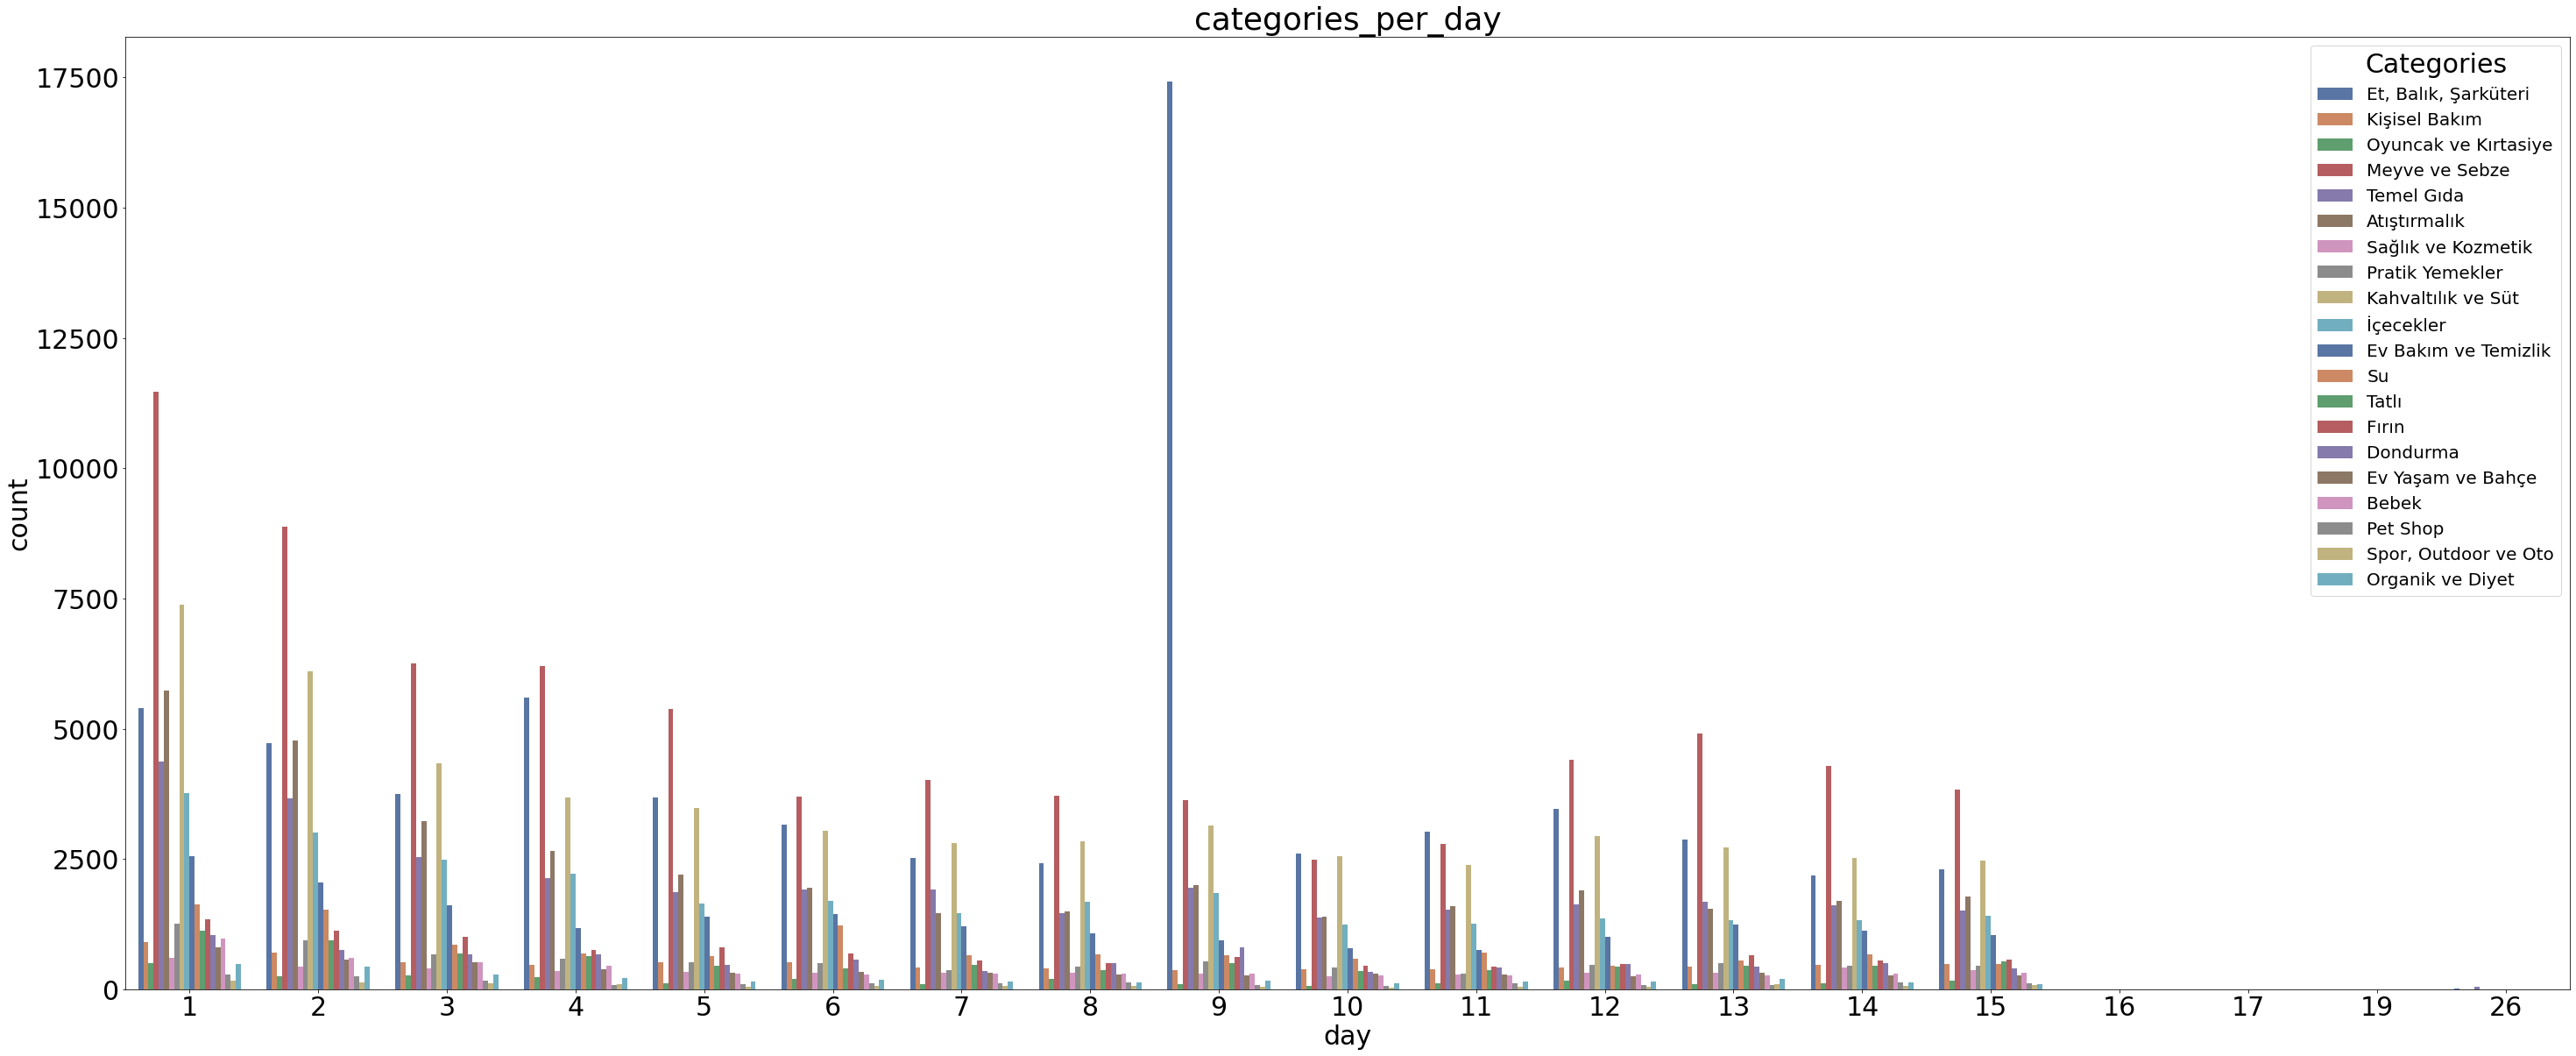

In [73]:
plt.figure(figsize=(50, 20))
plt.rcParams['font.size'] = '30'
palette = sns.color_palette("deep")
sns.countplot(x="day", hue="category", data=sales_df, palette=palette)
plt.legend(fontsize=20, loc='upper right', title='Categories')
plt.title('categories_per_day')
plt.show()
plt.close()

Again, day 16,17,19 and 26 has very few data compared to others to do sessional prediction.

In [74]:
sales_df = sales_df[sales_df.day.isin(range(0,16))]

In [75]:
sales_df

,event,sessionid,eventtime,price,productid,brand,category,subcategory,name,hour,day,year
0,cart,a0655eee-1267-4820-af21-ad8ac068ff7a,2020-06-01 08:59:16.406000+00:00,14.48,HBV00000NVZE8,None,"Et, Balık, Şarküteri",Kırmızı Et,Dana Kıyma (%5-%7 Yağ) 250 gr,8,1,2020
1,cart,d2ea7bd3-9235-4a9f-a9ea-d7f296e71318,2020-06-01 08:59:46.580000+00:00,49.90,HBV00000U2B18,Oral-B,Kişisel Bakım,Ağız Bakım,Diş Fırçası Yedek Başlığı Stages Çocuk 2 Adet,8,1,2020
2,cart,5e594788-78a0-44dd-8e66-37022d48f691,2020-06-01 08:59:33.308000+00:00,1.99,OFIS3101-080,Noki,Oyuncak ve Kırtasiye,Dosyalama ve Arşivleme,Noki Dosya Çıtçıtlı Evrak Zarfı Kırmızı 3101 T...,8,1,2020
3,cart,fdfeb652-22fa-4153-b9b5-4dfa0dcaffdf,2020-06-01 08:59:31.911000+00:00,2.25,HBV00000NVZBW,None,Meyve ve Sebze,Sebze,Domates 500 gr,8,1,2020
4,cart,9e9d4f7e-898c-40fb-aae9-256c40779933,2020-06-01 08:59:33.888000+00:00,9.95,HBV00000NE0T4,Carrefour,Temel Gıda,Sıvı Yağ,Carrefour Ayçiçek Yağı 1 lt,8,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
387651,cart,0ce386d3-f9ae-46b1-a018-baa5ea91be0c,2020-06-15 03:55:05.322000+00:00,19.90,HBV00000OE884,Carrefour,İçecekler,Kahve,Carrefour Selection Espresso Forte 10 Adet Kapsül,3,15,2020
387652,cart,69be07e4-737d-4935-b2eb-e02ecd94986b,2020-06-15 03:56:50.064000+00:00,9.95,HBV00000OE8AU,Carrefour,Atıştırmalık,Kuruyemiş,Carrefour Çiğ Fındık İçi 150 gr,3,15,2020
387653,cart,25f6960c-0144-419d-8761-2b539c75c9c9,2020-06-15 03:03:23.859000+00:00,21.95,HBV00000PQM1C,Vernel,Ev Bakım ve Temizlik,Çamaşır Yıkama,Vernel Yumuşatıcı Taze Gül 5 Lt,3,15,2020
387654,cart,eebd42a5-2d95-41b9-bc10-83db56ba3989,2020-06-15 03:29:54.865000+00:00,17.50,HBV00000NFHXT,Carte D'or,Dondurma,Kap Dondurma,Carte Dor Classic Myv Ygrt Dond 925ml,3,15,2020


Check how session are seperated.

In [76]:
sales_df.groupby(['sessionid'])['day'].nunique().reset_index(name='days').sort_values(by='days')

,sessionid,days
0,000280f4-62fc-4dcd-b51d-c66ac14d7d8c,1
36153,aa64de71-2e83-461f-92d5-7124cf3e4c76,1
36154,aa6651b5-d0b6-4687-9a44-32071531a1a2,1
36155,aa67593d-50bb-41ef-b95a-0b56fac77f20,1
36156,aa690730-8b6d-49f9-955c-c82e160ac38b,1
...,...,...
25704,78e237aa-8afa-4d8f-8025-615d854eb721,2
24423,72d72eaa-1024-4c0a-8ee9-bc75b8838e12,2
31240,93344c10-4883-4b54-9c11-41bdf59b78c3,2
26124,7b0f2e83-4fce-41b7-8a33-3d7465ff6f78,2


In [77]:
sales_df.groupby(['sessionid'])['hour'].nunique().reset_index(name='hours').sort_values(by='hours')

,sessionid,hours
0,000280f4-62fc-4dcd-b51d-c66ac14d7d8c,1
35384,a71d75f6-adba-467f-8000-091cb1c2bf99,1
35385,a71dc9e2-905f-4366-805f-a62381488cd8,1
35386,a71efb98-42c9-4ed7-a744-59dc5ef13e0e,1
35387,a71fbb3f-402e-4b90-8f11-9cacd837049e,1
...,...,...
29015,88ce1c52-5c5e-4b29-8bfd-b06f9e8e8c90,4
50418,edac42ea-caf5-4e45-9d76-dbfc153c9b3c,4
30511,8f86c004-4170-4460-b0e4-d71e17b02461,5
45693,d722265d-1478-414f-912f-4249824fe25b,5
